<a href="https://www.kaggle.com/code/leekahwin/visualizing-regression-training-and-residual-plots?scriptVersionId=103826525" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This notebook will show comprehensive regression implementation with <b>visualising</b> the <b>training process</b>  and as well effective <b>residual plots</b>. It will implement 8 diversified regression plots. The concatenated end result shows that voting regressor has the best performance due to having the best MAE, MSE, RMSE, R2, and adjusted R2.
<br>
Author: Morris Lee (21/8/2022)

#### [Preprocessing Part](#1)
* [Import Packages and Read Data](#1.1)
* [Cleaning Data & One-Hot-Encoding](#1.2)
    
#### [Analysis Part](#2)
* [Import Libraries and Train Test Split](#2.1)
* [Cross Validation to Identify Standardisation or Normalisation](#2.2)
* [Define Model Visualisation Functions](#2.3)
    * [Visualise Linear Regressor](#2.3.1)
    * [Visualise BayesianRidge Regressor](#2.3.2)
    * [Visualise K-Nearest Neighnor Regressor](#2.3.3)
    * [Visualise Decision Tree Regressor](#2.3.4)
    * [Visualise Random Forest Regressor](#2.3.5)
    * [Visualise Bagging Regression](#2.3.6)
    * [Visualise Voting Regressor](#2.3.7)
    * [Visualise Stacking Regressor](#2.3.8)
* [Final Result](#2.4)

# <h1 style='background :Cornsilk' ><center> Part 1 Pre-Processing </center></h1> <a class="anchor" id="1"></a>
# <h2 style='background :Cornsilk' ><center> Part 1.1. Import Packages and Read Data </center></h2> <a class="anchor" id="1.1"></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.ticker as mtick

matplotlib.style.use('default')

def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')

def vc(df, column, r=False):
    vc_df = df.reset_index().groupby([column]).size().to_frame('count')
    vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
    vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
    if r:
        return vc_df
    else:
        print(f'STATUS: Value counts of "{column}"...')
        display(vc_df)
def one_hot_encode(df, column):
    # Get one hot encoding of columns B
    one_hot = pd.get_dummies(df[column]).add_prefix(f'{column}_')
    # Drop column as it is now encoded
    df = df.drop(column,axis = 1)
    print(f"one hot encoded {column}")
    # Join the encoded df
    df = df.join(one_hot)
    return df
def null(df,df_name):
    if df.isnull().values.any() ==False:
        print(f'STATUS: There is NO ANY null value in {df_name}')
    else:
        print('STATUS: There is null value in dataframe')
        columns = df.columns[df.isna().any()].tolist()
        temp = {}
        for column in columns:
            count = (len(df)) - (df[column].count())
            temp[column] = f"{count} ({round((count/len(df)), 4)*100}%)"
        print(f'STATUS: Nulls of {df_name} = {temp} of total {len(df)}')
# set path
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
shape(df,'df')
null(df,'df')
df.head()

STATUS: Dimension of "df" = (1338, 7)
STATUS: There is NO ANY null value in df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# <h2 style='background :Cornsilk' ><center> Part 1.2. Cleaning Data & One-Hot-Encoding </center></h2> <a class="anchor" id="1.2"></a>

In [2]:
df['age_bin'] = pd.cut(df['age'],bins=8)
df['age_bin'] = df['age_bin'].astype('str')
df2 = df.drop('age', axis=1)
columns = ['age_bin', 'sex','children', 'smoker','region']
for col in columns:
    vc(df2,col)
    df2 = one_hot_encode(df2, col)
    shape(df2,f'df after encoded {col}')
df2.head()

STATUS: Value counts of "age_bin"...


,count,percentage (%)
age_bin,,
"(17.954, 23.75]",250,18.684604
"(46.75, 52.5]",173,12.929746
"(23.75, 29.5]",167,12.481315
"(52.5, 58.25]",159,11.883408
"(29.5, 35.25]",157,11.733931
"(35.25, 41.0]",154,11.509716
"(41.0, 46.75]",139,10.388640
"(58.25, 64.0]",139,10.388640


one hot encoded age_bin
STATUS: Dimension of "df after encoded age_bin" = (1338, 14)
STATUS: Value counts of "sex"...


,count,percentage (%)
sex,,
male,676,50.523169
female,662,49.476831


one hot encoded sex
STATUS: Dimension of "df after encoded sex" = (1338, 15)
STATUS: Value counts of "children"...


,count,percentage (%)
children,,
0,574,42.899851
1,324,24.215247
2,240,17.937220
3,157,11.733931
4,25,1.868460
5,18,1.345291


one hot encoded children
STATUS: Dimension of "df after encoded children" = (1338, 20)
STATUS: Value counts of "smoker"...


,count,percentage (%)
smoker,,
no,1064,79.521674
yes,274,20.478326


one hot encoded smoker
STATUS: Dimension of "df after encoded smoker" = (1338, 21)
STATUS: Value counts of "region"...


,count,percentage (%)
region,,
southeast,364,27.204783
northwest,325,24.289985
southwest,325,24.289985
northeast,324,24.215247


one hot encoded region
STATUS: Dimension of "df after encoded region" = (1338, 24)


,bmi,charges,"age_bin_(17.954, 23.75]","age_bin_(23.75, 29.5]","age_bin_(29.5, 35.25]","age_bin_(35.25, 41.0]","age_bin_(41.0, 46.75]","age_bin_(46.75, 52.5]","age_bin_(52.5, 58.25]","age_bin_(58.25, 64.0]",...,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,27.900,16884.92400,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33.770,1725.55230,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33.000,4449.46200,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,22.705,21984.47061,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,28.880,3866.85520,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


Log Transformation


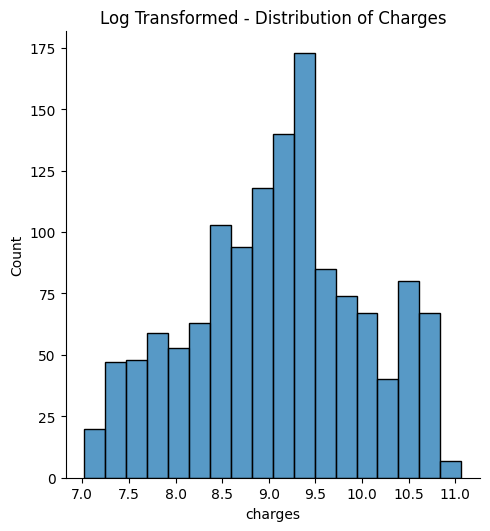

In [3]:
def vis_dist(df, col, title,lim=False):
    variable = df[col].values
    ax = sns.displot(variable)
    plt.title(f'{title}')
    plt.xlabel(f'{col}')
    if lim:
        plt.xlim(0, 4000)
    return plt.show()

df3=df2.copy()
print("Log Transformation")
df3['charges'] = np.log1p(df3['charges'])
vis_dist(df3, 'charges','Log Transformed - Distribution of Charges')

# <h1 style='background :Cornsilk' ><center> Part 2. Analysis </center></h1> <a class="anchor" id="2"></a>
# <h2 style='background :Cornsilk' ><center> Part 2.1 Import Libraries and Train Test Split </center></h2> <a class="anchor" id="2.1"></a>

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn import tree
RANDOM_NUMBER = 42
y =df3[['charges']].values
X = df3.drop('charges',axis=1)

def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_NUMBER)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    shape(X_train,'X_train') ; shape(X_test,'X_test') ; shape(y_train,'y_train') ; shape(y_test,'y_test')
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

STATUS: Dimension of "X_train" = (1070, 23)
STATUS: Dimension of "X_test" = (268, 23)
STATUS: Dimension of "y_train" = (1070,)
STATUS: Dimension of "y_test" = (268,)


In [5]:
def test_predict(model,X_train,X_test,y_train,y_test, parameters = None):
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    model_text_list=[]; metric_list=[]; score_list=[] ; param_list=[]
    
    # create list of metric to be examined
    metric_functions = [r2_score, r2_score, mean_squared_error,mean_squared_error,mean_absolute_error]
    metric_functions_text = ['R_Squared', 'Adj_R_Squared', 'MSE','RMSE','MAE']
    
    # for loop of each of the 5 metrics
    for metric_function, metric_function_text in zip(metric_functions, metric_functions_text):
        if metric_function_text == 'Adj_R_Squared':
            Adj_r2 = 1 - (1-r2_score(y_test, prediction_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
            model_text_list.append(type(model).__name__); metric_list.append(metric_function_text); score_list.append(Adj_r2); param_list.append(parameters)
        elif metric_function_text == 'RMSE':
            rmse = mean_squared_error(y_test, prediction_test, squared=False)
            model_text_list.append(type(model).__name__); metric_list.append(metric_function_text); score_list.append(rmse); param_list.append(parameters)
        else:
            model_text_list.append(type(model).__name__); metric_list.append(metric_function_text); score_list.append(metric_function(y_test, prediction_test)); param_list.append(parameters) 
    
    d = {'model':model_text_list, 'parameters': param_list ,'metric': metric_list, 'test predict score': score_list}
    df = pd.DataFrame(data=d)
    return df

def five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train):
    sh = HalvingGridSearchCV(ESTIMATOR, PARAM_DICT, cv=10, scoring='neg_mean_absolute_error',min_resources="smallest",random_state=RANDOM_NUMBER).fit(X_train, y_train)
    best_estimator = sh.best_estimator_
    best_param = sh.best_params_
    print(best_estimator)
    print(f"10-CV Best Parameters = {best_param}")
    print(f"10-CV Best Score = {sh.best_score_}")
    return best_estimator, best_param

def cross_validation(model, treated_X, y):
    # drop na columns
    treated_X = treated_X.dropna(axis=1)
    # train test split
    X_train, X_test, y_train, y_test = split_data(treated_X, y)
    # cross validation
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    mean = scores.mean() ; std =scores.std()
    print(f"Average neg_mean_absolute_error: {mean}   , Std: {std}")
    print()
    return mean

# <h2 style='background :Cornsilk' ><center> Part 2.2 Cross Validation to Identify Standardisation or Normalisation </center></h2> <a class="anchor" id="2.2"></a>

In [6]:
model = RandomForestRegressor(random_state=RANDOM_NUMBER)

print("10 fold cross validation, where the higher the value, the better, this is because the MAE is negated")
print()

# normalisation (min max scalling)
print("normalisation (min max scalling)")
normalized_X = (X-X.min())/(X.max()-X.min())
norm_score = cross_validation(model, normalized_X, y)

# standardisation
print("standardisation")
standardized_X = (X-X.mean())/X.std()
std_score = cross_validation(model, standardized_X, y)

if norm_score> std_score:
    print(f"Normalisation is better than standardisation, where {norm_score}>{std_score}")
    print("Normalisation is chosen")
    X_train, X_test, y_train, y_test = split_data(normalized_X, y)
else:
    print(f"Standardisation is better than normalisation, where {std_score}>{norm_score}")
    print("Standardisation is chosen")
    X_train, X_test, y_train, y_test = split_data(standardized_X, y)

10 fold cross validation, where the higher the value, the better, this is because the MAE is negated

normalisation (min max scalling)
STATUS: Dimension of "X_train" = (1070, 23)
STATUS: Dimension of "X_test" = (268, 23)
STATUS: Dimension of "y_train" = (1070,)
STATUS: Dimension of "y_test" = (268,)
Average neg_mean_absolute_error: -0.230943432548314   , Std: 0.030498352033515478

standardisation
STATUS: Dimension of "X_train" = (1070, 23)
STATUS: Dimension of "X_test" = (268, 23)
STATUS: Dimension of "y_train" = (1070,)
STATUS: Dimension of "y_test" = (268,)
Average neg_mean_absolute_error: -0.23080503785200576   , Std: 0.030631222011426

Standardisation is better than normalisation, where -0.23080503785200576>-0.230943432548314
Standardisation is chosen
STATUS: Dimension of "X_train" = (1070, 23)
STATUS: Dimension of "X_test" = (268, 23)
STATUS: Dimension of "y_train" = (1070,)
STATUS: Dimension of "y_test" = (268,)


# <h2 style='background :Cornsilk' ><center> Part 2.3 Define Model Visualisation Functions </center></h2> <a class="anchor" id="2.3"></a>

In [7]:
def inverse_log1p(Y, inverse=True):
    if inverse==True:
        actual = np.expm1(Y)
    else:
        actual = Y
    return actual

def residual(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    prediction_train_actual = inverse_log1p(prediction_train)
    prediction_test_actual = inverse_log1p(prediction_test)
    
    # PERFORMANCE METRICS
    mse_test = mean_squared_error(y_test, prediction_test, squared=True)
    rmse_test = mean_squared_error(y_test, prediction_test, squared=False)
    mse_train = mean_squared_error(y_train, prediction_train, squared=True)
    rmse_train = mean_squared_error(y_train, prediction_train, squared=False)
    mse_test_actual = mean_squared_error(inverse_log1p(y_test), inverse_log1p(prediction_test), squared=True)
    rmse_test_actual = mean_squared_error(inverse_log1p(y_test), inverse_log1p(prediction_test), squared=False)
    mse_train_actual = mean_squared_error(inverse_log1p(y_train), inverse_log1p(prediction_train), squared=True)
    rmse_train_actual = mean_squared_error(inverse_log1p(y_train), inverse_log1p(prediction_train), squared=False)
    
    # RESIDUAL FOR ACTUAL AND LOGGED
    residual_train = y_train - prediction_train
    residual_test = y_test - prediction_test
    residual_train_actual = inverse_log1p(y_train) - inverse_log1p(prediction_train)
    residual_test_actual = inverse_log1p(y_test) - inverse_log1p(prediction_test)
    
    fig, axs = plt.subplots(nrows = 2, ncols = 2)
    fig = matplotlib.pyplot.gcf()
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    fig.set_size_inches(10, 8)
    fig.suptitle(f"Residual of {type(model).__name__}", fontsize=14,fontweight='bold')
    

    axs[0,0].sharex(axs[0,1])
    axs[0,0].sharey(axs[0,1])
    axs[1,0].sharex(axs[1,1])
    axs[1,0].sharey(axs[1,1])
    
    axs[0,0].scatter(x = prediction_train,y = residual_train, alpha=0.1,color='red',label='Train Set')
    axs[0,0].set_title(f'Training Set (Log-Transformed Y)',fontweight='bold')
    axs[0,0].set_xlabel('Predicted Values (Logged)')
    axs[0,0].set_ylabel('Residual')
    yabs_max = abs(max(axs[0,0].get_ylim(), key=abs))
    axs[0,0].axhline(y=0, color='black', linestyle='--', label='Zero Residual')
    axs[0,0].legend()
    
    
    axs[0,1].scatter(x = prediction_test,y = residual_test, alpha=0.1,color='blue',label='Test Set')
    axs[0,1].set_title(f'Testing Set (Log-Transformed Y)',fontweight='bold')
    axs[0,1].set_xlabel('Predicted Values (Logged)')
    yabs_max = abs(max(axs[0,1].get_ylim(), key=abs))
    axs[0,1].axhline(y=0, color='black', linestyle='--', label='Zero Residual')
    axs[0,1].legend()
    
    axs[1,0].scatter(x = prediction_train_actual,y = residual_train_actual, alpha=0.1,color='red',label='Train Set')
    axs[1,0].set_title(f'Training Set (Actual)',fontweight='bold')
    axs[1,0].set_xlabel('Predicted Values (Actual)')
    axs[1,0].set_ylabel('Residual')
    yabs_max = abs(max(axs[1,0].get_ylim(), key=abs))
    axs[1,0].axhline(y=0, color='black', linestyle='--', label='Zero Residual')
    axs[1,0].legend()
    
    axs[1,1].scatter(x = prediction_test_actual,y = residual_test_actual, alpha=0.1,color='blue',label='Train Set')
    axs[1,1].set_title(f'Testing Set  (Actual)',fontweight='bold')
    axs[1,1].set_xlabel('Predicted Values (Actual)')
    yabs_max = abs(max(axs[1,1].get_ylim(), key=abs))
    axs[1,1].axhline(y=0, color='black', linestyle='--', label='Zero Residual')
    axs[1,1].legend()
    
    props = dict(boxstyle='square', facecolor='whitesmoke', alpha=1, pad=0.5)
    axs[0,0].text(0.6, 0.75, f"MSE = {mse_train:.2f} \nRMSE = {rmse_train:.2f}", transform=axs[0,0].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
    axs[0,1].text(0.6, 0.75, f"MSE = {mse_test:.2f} \nRMSE = {rmse_test:.2f}", transform=axs[0,1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
    axs[1,0].text(0.6, 0.75, f"MSE = {mse_train_actual:.2E} \nRMSE = {rmse_train_actual:.2E}", transform=axs[1,0].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
    axs[1,1].text(0.6, 0.75, f"MSE = {mse_test_actual:.2E} \nRMSE = {rmse_test_actual:.2E}", transform=axs[1,1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
    return plt.show()
# Calling fit() more than once will overwrite what was learned by any previous fit().
def training_curve(model,X_train,X_test,y_train,y_test, num, parameters = None):
    stages_shape = np.linspace(100, X_train.shape[0], num, dtype =int)
    progress_stages = np.linspace(10, 100, num, dtype =int)/100
    MSE = []
    RMSE = []
    R2 = []
    for stage in stages_shape:
        X_train_temp = X_train[:stage]
        y_train_temp = y_train[:stage]
        model.fit(X_train_temp, y_train_temp)
        prediction_test = model.predict(X_test)
        
        mse = mean_squared_error(y_test, prediction_test, squared=True)
        rmse = mean_squared_error(y_test, prediction_test, squared=False)
        r2 = r2_score(y_test, prediction_test)
        
        MSE.append(mse)
        RMSE.append(rmse)
        R2.append(r2)
        
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, sharex=True)
    fig = matplotlib.pyplot.gcf()
    fig.subplots_adjust(hspace=0.1)
    fig.set_size_inches(10, 5)
    fig.suptitle(f"{type(model).__name__} Training Curve", fontsize=14,fontweight='bold')
    
    ax1.scatter(x = progress_stages,y = R2, color='deeppink',label='R2',s=10)
    ax1.set_title(f'Metrics of Unseen Data Against Training Data Proportion',fontweight='bold')
    ax1.set_ylabel('R2')
    ax1.legend(loc='center right')
    
    ax2.scatter(x = progress_stages,y = MSE, color='green',label='MSE',s=10, marker=r'x')
    ax2.set_ylabel('MSE')
    ax2.legend(loc='center right')
    
    ax3.scatter(x = progress_stages,y = RMSE, color='olive',label='RMSE',s=10, marker=r'^')
    ax3.set_xlabel('Training Data Proportion',fontweight='bold')
    ax3.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax3.set_ylabel('RMSE')
    ax3.legend(loc='center right')
    fig.text(0.03, 0.5, 'Unseen Testing Set Metrics', va='center', rotation='vertical',fontweight='bold')
    return plt.show()

# <h2 style='background :Cornsilk' > Part 2.3.1 Visualise Linear Regression </h2> <a class="anchor" id="2.3.1"></a>

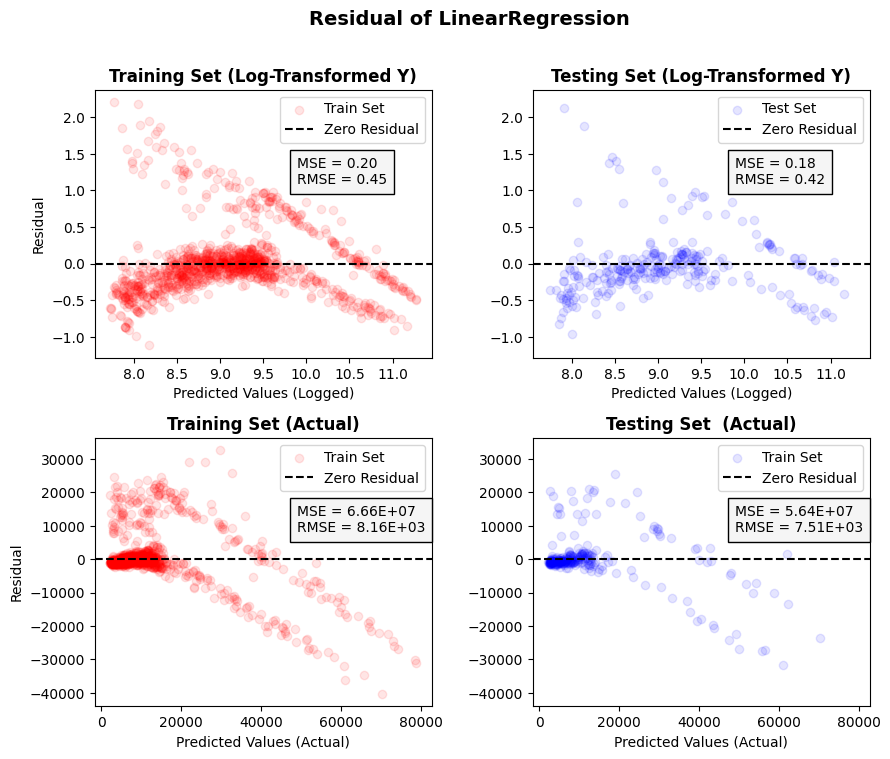

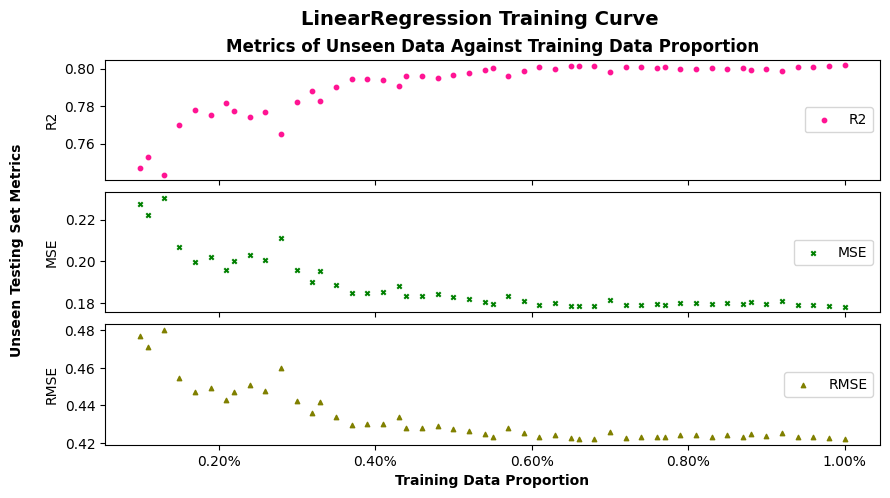

,model,parameters,metric,test predict score
0,LinearRegression,None,R_Squared,0.801854
1,LinearRegression,None,Adj_R_Squared,0.798386
2,LinearRegression,None,MSE,0.178104
3,LinearRegression,None,RMSE,0.422024
4,LinearRegression,None,MAE,0.283797


In [8]:
# LinearRegression
model = LinearRegression()
LinearRegression_test = test_predict(model, X_train,X_test,y_train,y_test)

#visualise
residual(model,X_train,X_test,y_train,y_test)
training_curve(model,X_train,X_test,y_train,y_test, num=50, parameters = None)

LinearRegression_test

# <h2 style='background :Cornsilk' > Part 2.3.2 Visualise BayesianRidge Regression </h2> <a class="anchor" id="2.3.2"></a>

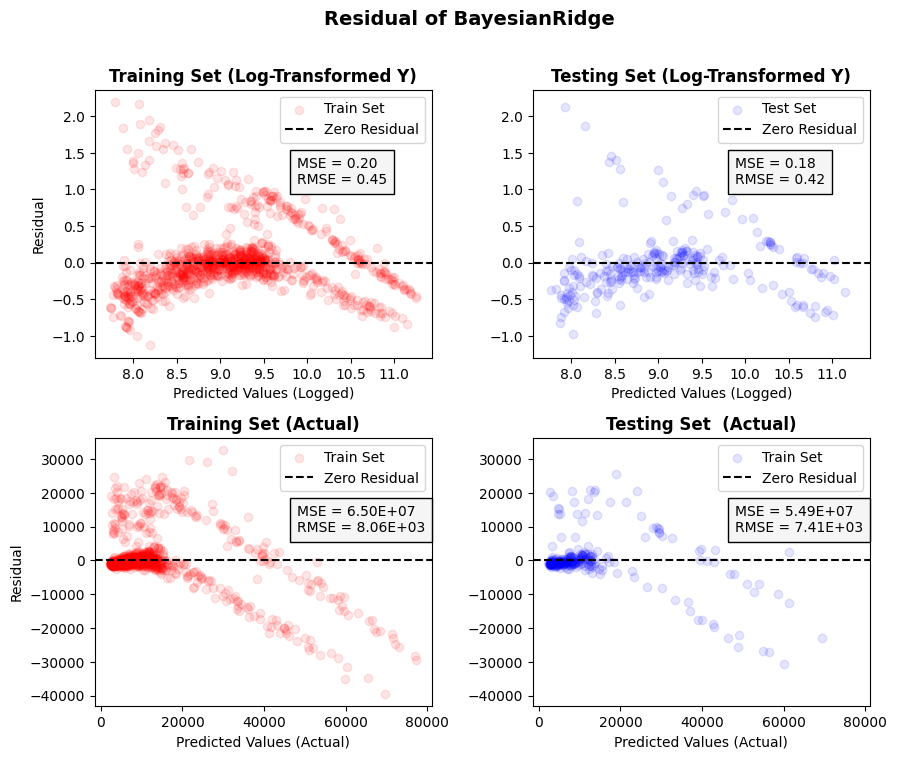

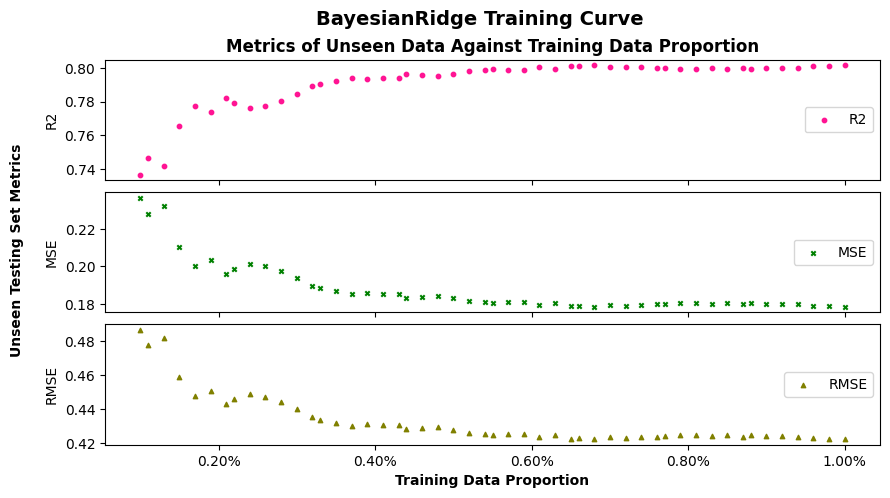

,model,parameters,metric,test predict score
0,BayesianRidge,None,R_Squared,0.801529
1,BayesianRidge,None,Adj_R_Squared,0.798055
2,BayesianRidge,None,MSE,0.178396
3,BayesianRidge,None,RMSE,0.422370
4,BayesianRidge,None,MAE,0.284497


In [9]:
# BayesianRidge

model = BayesianRidge()

BayesianRidge_test = test_predict(model, X_train,X_test,y_train,y_test)
residual(model,X_train,X_test,y_train,y_test)
training_curve(model,X_train,X_test,y_train,y_test, num=50, parameters = None)
BayesianRidge_test

# <h2 style='background :Cornsilk' > Part 2.3.3 Visualise KNeighborsRegressor </h2> <a class="anchor" id="2.3.3"></a>

KNeighborsRegressor(n_neighbors=7, weights='distance')
10-CV Best Parameters = {'n_neighbors': 7, 'weights': 'distance'}
10-CV Best Score = -0.349268980647182


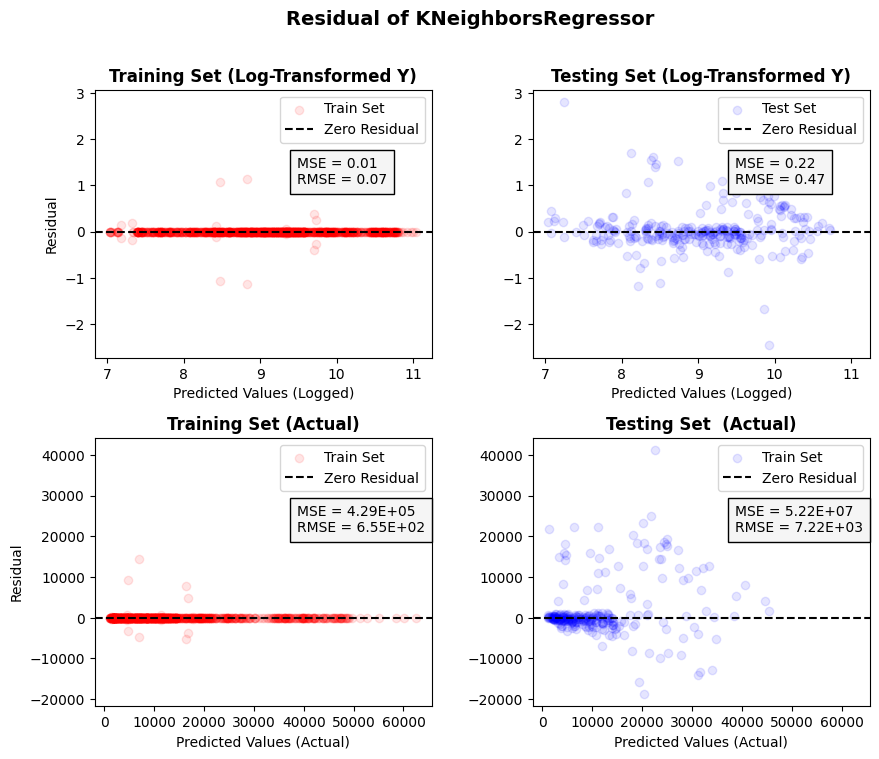

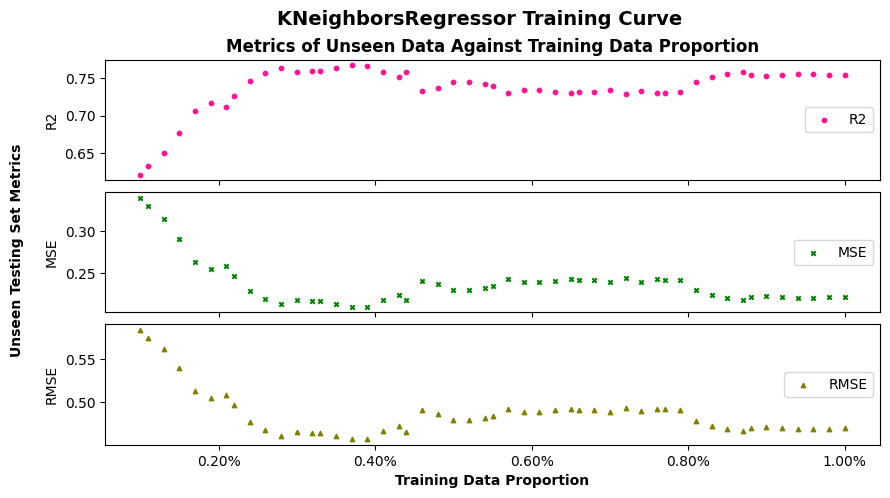

,model,parameters,metric,test predict score
0,KNeighborsRegressor,"{'n_neighbors': 7, 'weights': 'distance'}",R_Squared,0.754443
1,KNeighborsRegressor,"{'n_neighbors': 7, 'weights': 'distance'}",Adj_R_Squared,0.750145
2,KNeighborsRegressor,"{'n_neighbors': 7, 'weights': 'distance'}",MSE,0.220719
3,KNeighborsRegressor,"{'n_neighbors': 7, 'weights': 'distance'}",RMSE,0.469808
4,KNeighborsRegressor,"{'n_neighbors': 7, 'weights': 'distance'}",MAE,0.277909


In [10]:
# KNN Tune Parameter

PARAM_DICT = {'n_neighbors': [5,7,9,11,13],'weights': ['uniform', 'distance']}
ESTIMATOR =  KNeighborsRegressor()
best_KNN_estimator, best_param = five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train)

# visualise
residual(best_KNN_estimator,X_train,X_test,y_train,y_test)
training_curve(best_KNN_estimator,X_train,X_test,y_train,y_test, num=50, parameters = None)

# test predict
KNN_test = test_predict(best_KNN_estimator, X_train,X_test,y_train,y_test, best_param)
KNN_test

# <h2 style='background :Cornsilk' > Part 2.3.4 Visualise DecisionTreeRegressor </h2> <a class="anchor" id="2.3.4"></a>

DecisionTreeRegressor(max_depth=6, min_samples_split=3, random_state=42)
10-CV Best Parameters = {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}
10-CV Best Score = -0.24491050104994277


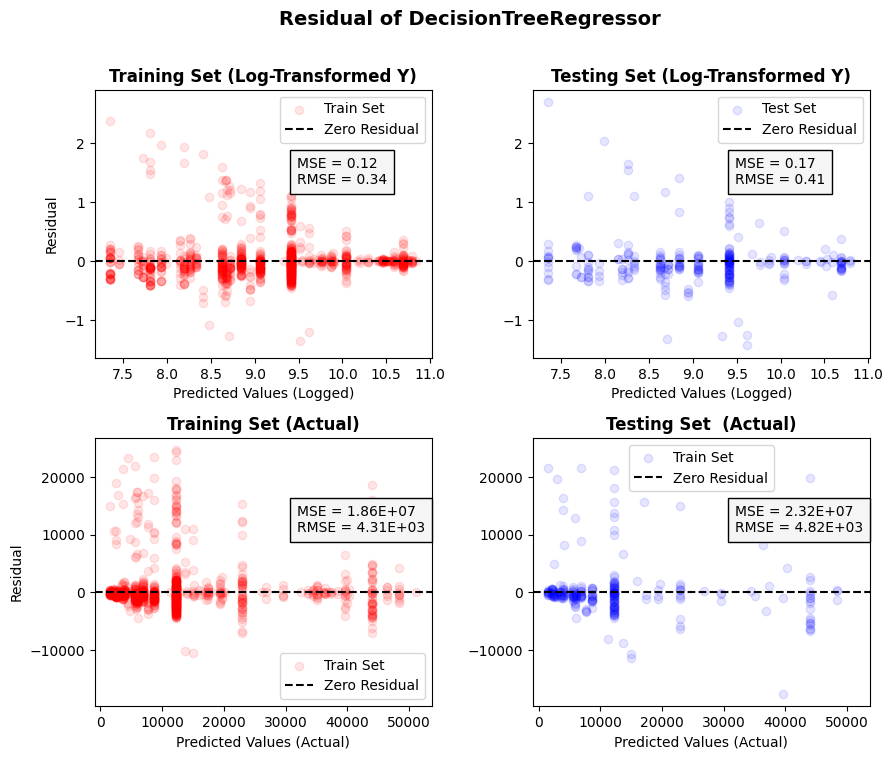

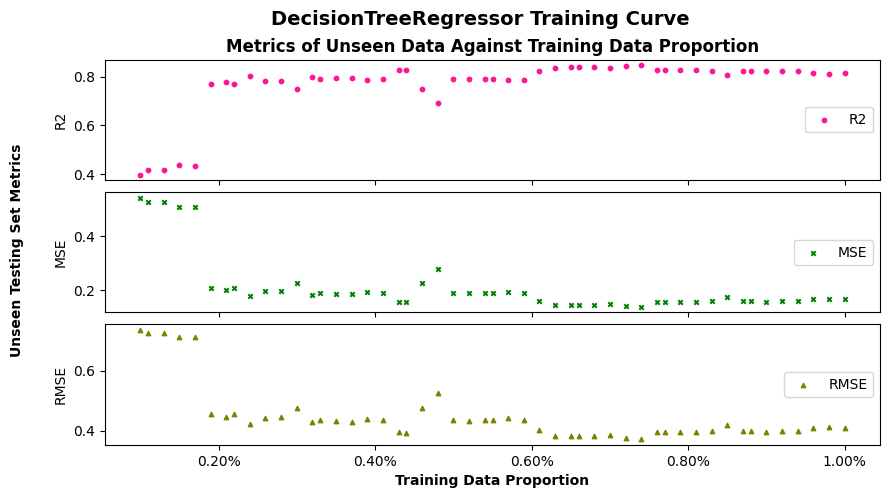

,model,parameters,metric,test predict score
0,DecisionTreeRegressor,"{'max_depth': 6, 'min_samples_leaf': 1, 'min_s...",R_Squared,0.813471
1,DecisionTreeRegressor,"{'max_depth': 6, 'min_samples_leaf': 1, 'min_s...",Adj_R_Squared,0.810206
2,DecisionTreeRegressor,"{'max_depth': 6, 'min_samples_leaf': 1, 'min_s...",MSE,0.167662
3,DecisionTreeRegressor,"{'max_depth': 6, 'min_samples_leaf': 1, 'min_s...",RMSE,0.409465
4,DecisionTreeRegressor,"{'max_depth': 6, 'min_samples_leaf': 1, 'min_s...",MAE,0.231015


In [11]:
# Decision Tree Tune Parameter

PARAM_DICT = {'max_depth': [None,3,4,5,6,7,8,9,10,11,15,20,25,30,35,40,45],'min_samples_split': [2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}
ESTIMATOR =  DecisionTreeRegressor(random_state=RANDOM_NUMBER)
best_dtc_estimator, best_param = five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train)
# visualise
residual(best_dtc_estimator,X_train,X_test,y_train,y_test)
training_curve(best_dtc_estimator,X_train,X_test,y_train,y_test, num=50)

# test predict
DTC_test = test_predict(best_dtc_estimator, X_train,X_test,y_train,y_test, best_param)
DTC_test

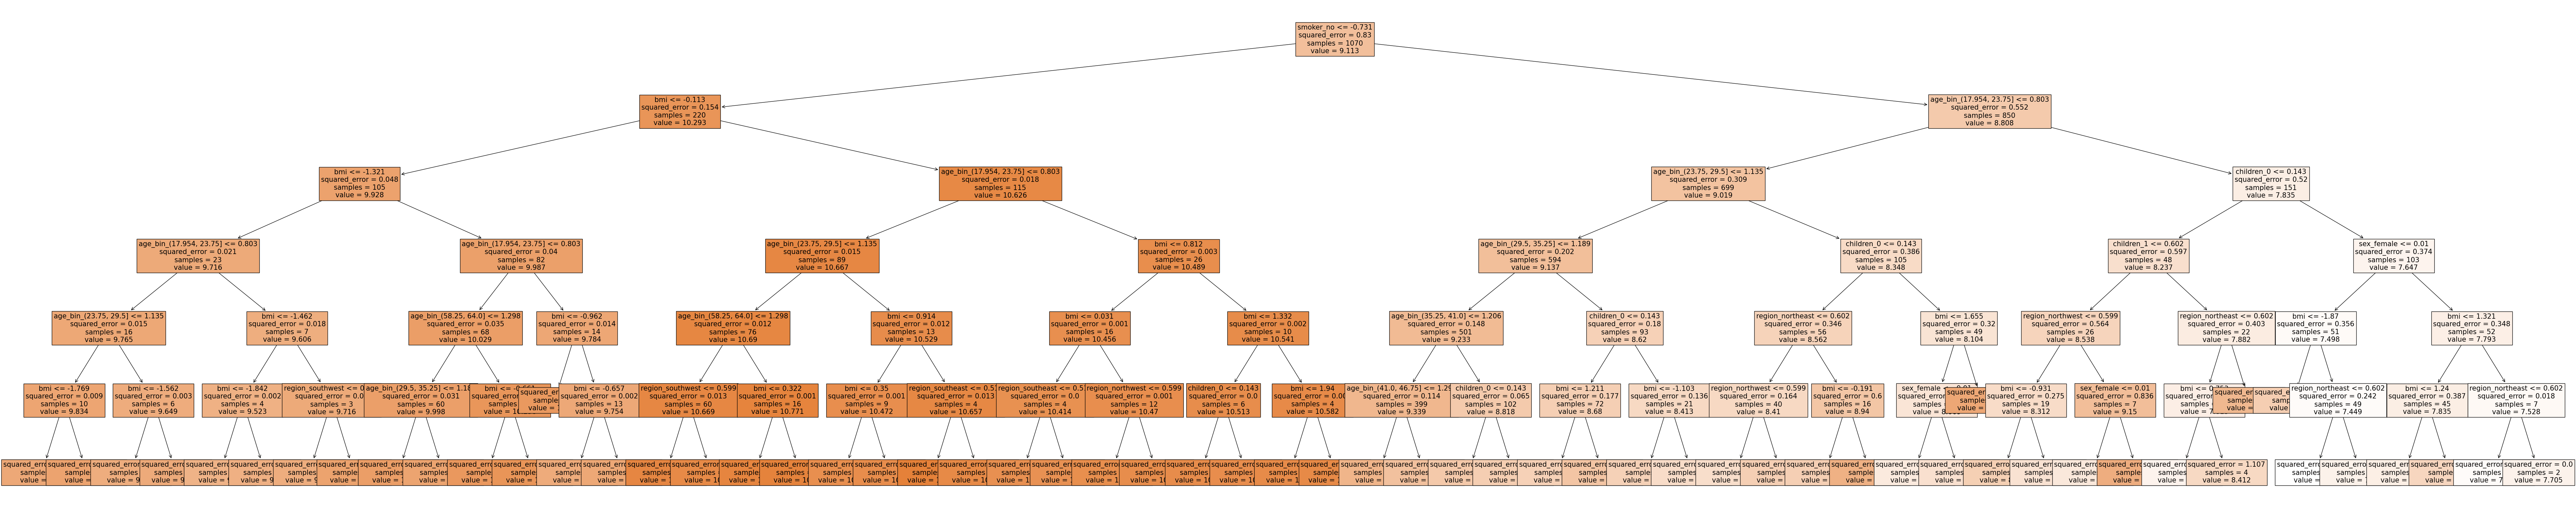

In [12]:
attribute_names=X_train.columns.tolist()
label_names=False

plt.figure(figsize=(100,20))
tree.plot_tree(best_dtc_estimator, 
                   feature_names =attribute_names,  
                   class_names=label_names,
                   filled=True, fontsize=15)
plt.show()

# <h2 style='background :Cornsilk' > Part 2.3.5 Visualise RandomForestRegressor </h2> <a class="anchor" id="2.3.5"></a>

RandomForestRegressor(min_samples_leaf=2, n_estimators=200, random_state=42)
10-CV Best Parameters = {'min_samples_leaf': 2, 'n_estimators': 200}
10-CV Best Score = -0.267011267270923


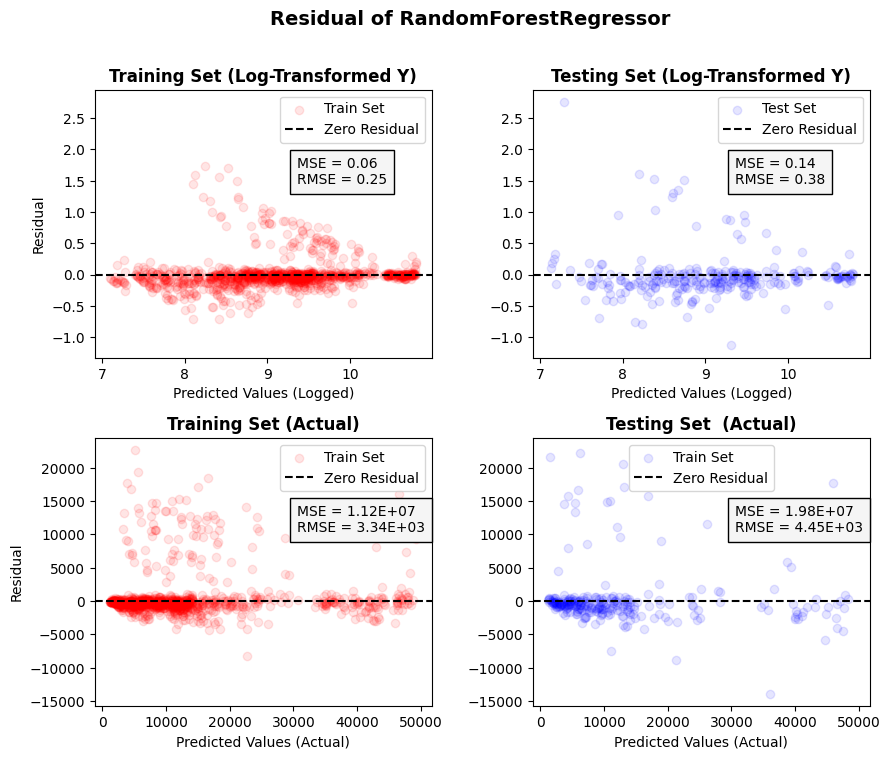

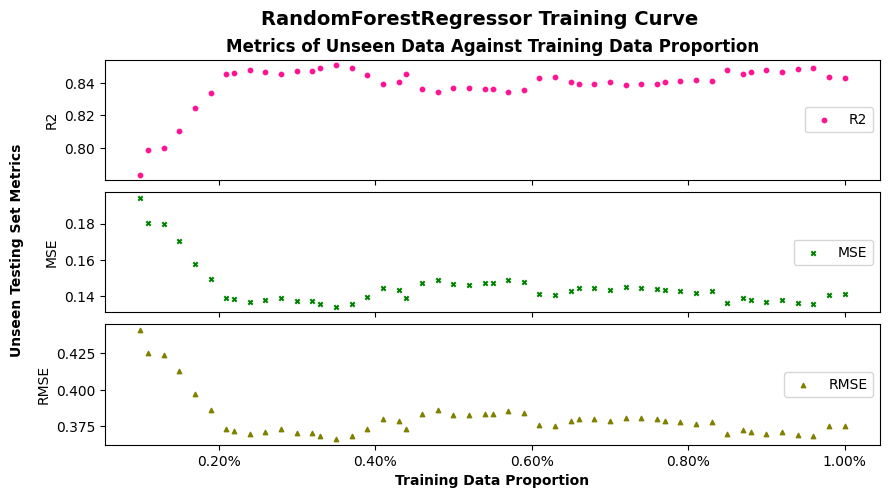

,model,parameters,metric,test predict score
0,RandomForestRegressor,"{'min_samples_leaf': 2, 'n_estimators': 200}",R_Squared,0.843095
1,RandomForestRegressor,"{'min_samples_leaf': 2, 'n_estimators': 200}",Adj_R_Squared,0.840349
2,RandomForestRegressor,"{'min_samples_leaf': 2, 'n_estimators': 200}",MSE,0.141034
3,RandomForestRegressor,"{'min_samples_leaf': 2, 'n_estimators': 200}",RMSE,0.375545
4,RandomForestRegressor,"{'min_samples_leaf': 2, 'n_estimators': 200}",MAE,0.206951


In [13]:
# RandomForestRegressor Tune Parameter
PARAM_DICT = {'n_estimators': [10,50,100,200,300],'min_samples_leaf':[1,2,3]}
ESTIMATOR =  RandomForestRegressor(random_state=RANDOM_NUMBER)
best_rfc_estimator, best_param = five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train)

# visualise
residual(best_rfc_estimator,X_train,X_test,y_train,y_test)
training_curve(best_rfc_estimator,X_train,X_test,y_train,y_test, num=50)

# test predict
RFC_test = test_predict(best_rfc_estimator, X_train,X_test,y_train, y_test, best_param)
RFC_test

# <h2 style='background :Cornsilk' > Part 2.3.6 Visualise BaggingRegressor </h2> <a class="anchor" id="2.3.6"></a>

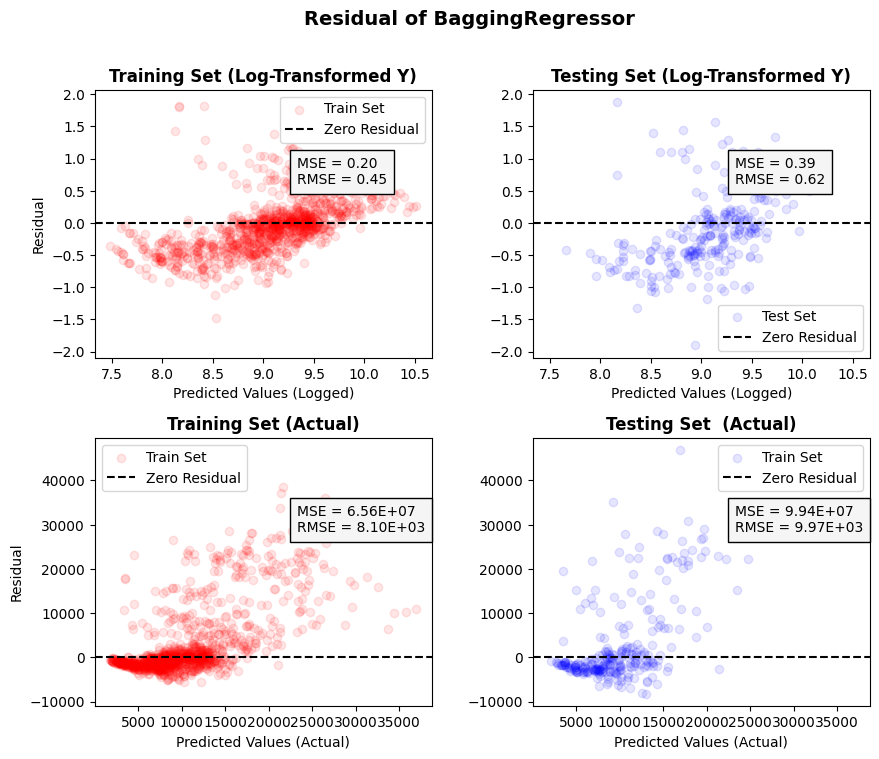

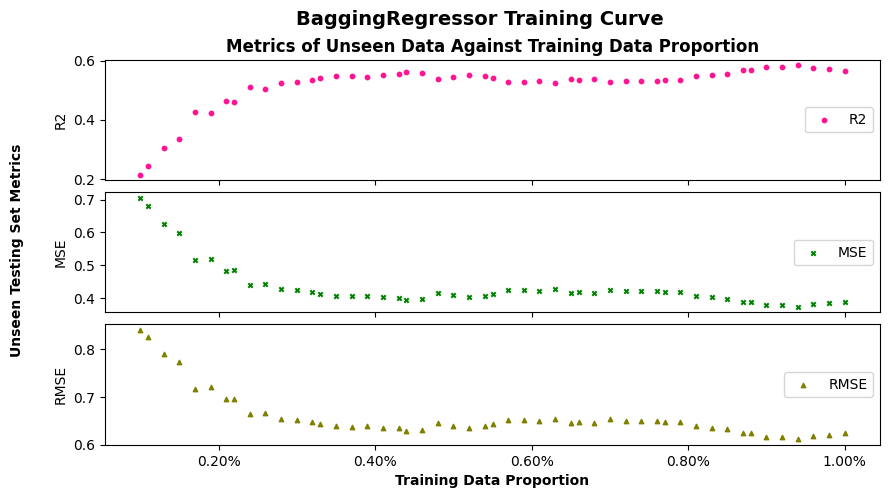

,model,parameters,metric,test predict score
0,BaggingRegressor,None,R_Squared,0.566409
1,BaggingRegressor,None,Adj_R_Squared,0.558820
2,BaggingRegressor,None,MSE,0.389735
3,BaggingRegressor,None,RMSE,0.624287
4,BaggingRegressor,None,MAE,0.505941


In [14]:
# Bagging Regressor

bagging_KNN = BaggingRegressor(best_KNN_estimator, max_samples=0.5, max_features=0.5, random_state=RANDOM_NUMBER)

# visualise
residual(bagging_KNN,X_train,X_test,y_train,y_test)
training_curve(bagging_KNN,X_train,X_test,y_train,y_test, num=50)

# test predict
bagging_KNN_test = test_predict(bagging_KNN, X_train,X_test,y_train,y_test)
bagging_KNN_test

# <h2 style='background :Cornsilk' > Part 2.3.7 Visualise VotingRegressor </h2> <a class="anchor" id="2.3.7"></a>

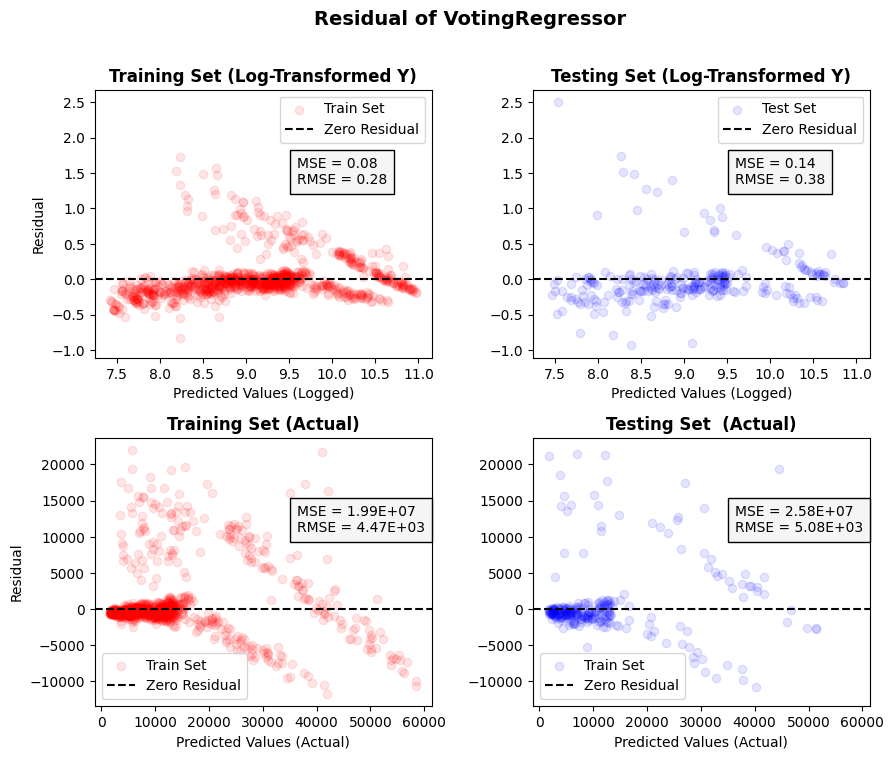

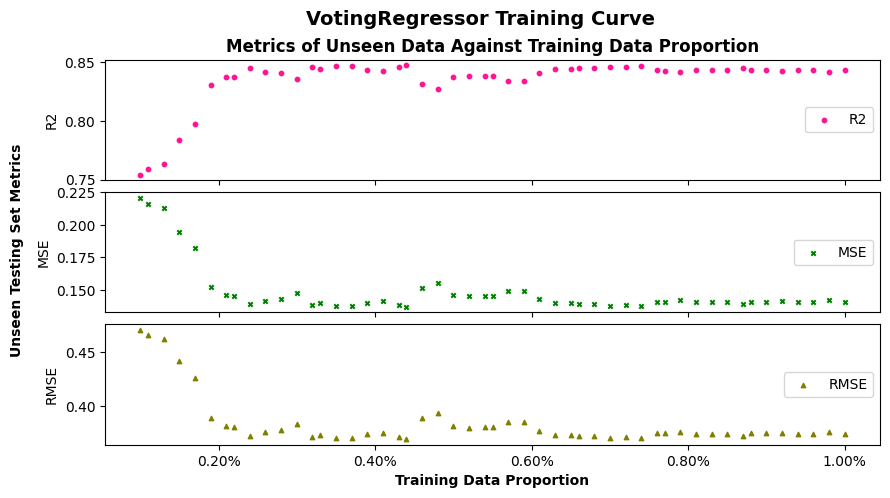

,model,parameters,metric,test predict score
0,VotingRegressor,None,R_Squared,0.843535
1,VotingRegressor,None,Adj_R_Squared,0.840797
2,VotingRegressor,None,MSE,0.140639
3,VotingRegressor,None,RMSE,0.375018
4,VotingRegressor,None,MAE,0.221232


In [15]:
# Voting Regressor
model_voting = VotingRegressor(estimators = [('lr',LinearRegression()),('br', BayesianRidge()), ('knn', best_KNN_estimator), \
                                              ('dtc', best_dtc_estimator), \
                                              ('rfc', best_rfc_estimator)])

# visualise
residual(model_voting,X_train,X_test,y_train,y_test)
training_curve(model_voting,X_train,X_test,y_train,y_test, num=50)

voting_test = test_predict(model_voting, X_train, X_test, y_train, y_test)
voting_test

# <h2 style='background :Cornsilk' > Part 2.3.8 Visualise StackingRegressor </h2> <a class="anchor" id="2.3.8"></a>

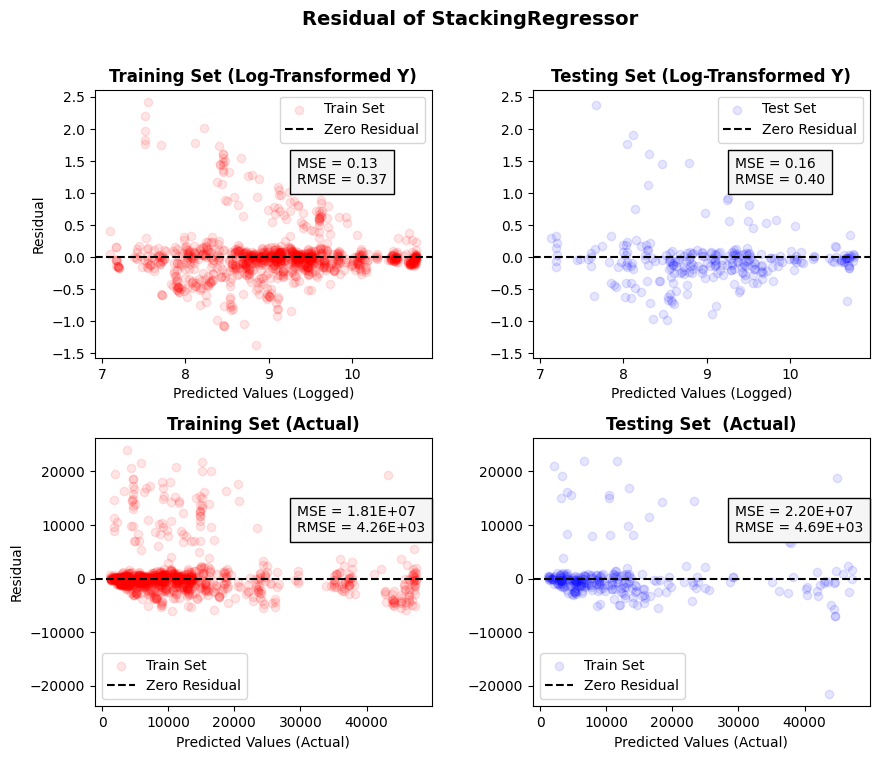

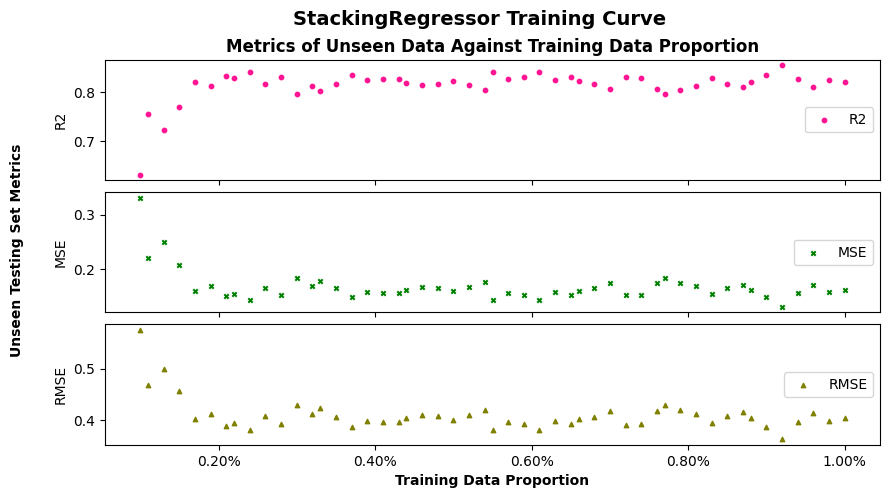

,model,parameters,metric,test predict score
0,StackingRegressor,None,R_Squared,0.819258
1,StackingRegressor,None,Adj_R_Squared,0.816094
2,StackingRegressor,None,MSE,0.162461
3,StackingRegressor,None,RMSE,0.403064
4,StackingRegressor,None,MAE,0.237954


In [16]:
# Stacking Regressor
model_stacking = StackingRegressor(estimators = [('lr',LinearRegression()),('br', BayesianRidge()), ('knn', best_KNN_estimator), \
                                              ('dtc', best_dtc_estimator), \
                                              ('rfc', best_rfc_estimator)], final_estimator=KNeighborsRegressor())

# visualise
residual(model_stacking,X_train,X_test,y_train,y_test)
training_curve(model_stacking,X_train,X_test,y_train,y_test, num=50)

stacking_test = test_predict(model_stacking, X_train, X_test, y_train, y_test)
stacking_test

# <h2 style='background :Cornsilk' ><center> Part 2.4 Final Results </center></h2> <a class="anchor" id="2.4"></a>

In [17]:
def concat_results(results_test):
    temp=[]
    for result in results_test:
        temp.append(result.pivot(index='model', columns='metric', values='test predict score').reset_index())
    merged = pd.concat(temp)
    for col in merged.columns.values:
        if col != 'model':
            if col == 'Adj_R_Squared' or col == 'R_Squared':
                best_model = merged[merged[col]==merged[col].max()].model.values[0]
                print(f"Best model for {col} = {best_model}")
            else:
                best_model = merged[merged[col]==merged[col].min()].model.values[0]
                print(f"Best model for {col} = {best_model}")
        else:
            pass
    display(merged)
    return merged

results_test = [LinearRegression_test, BayesianRidge_test, KNN_test, DTC_test, \
                RFC_test, bagging_KNN_test, voting_test, stacking_test]

merged_result_customer  = concat_results(results_test)


Best model for Adj_R_Squared = VotingRegressor
Best model for MAE = RandomForestRegressor
Best model for MSE = VotingRegressor
Best model for RMSE = VotingRegressor
Best model for R_Squared = VotingRegressor


metric,model,Adj_R_Squared,MAE,MSE,RMSE,R_Squared
0,LinearRegression,0.798386,0.283797,0.178104,0.422024,0.801854
0,BayesianRidge,0.798055,0.284497,0.178396,0.422370,0.801529
0,KNeighborsRegressor,0.750145,0.277909,0.220719,0.469808,0.754443
0,DecisionTreeRegressor,0.810206,0.231015,0.167662,0.409465,0.813471
0,RandomForestRegressor,0.840349,0.206951,0.141034,0.375545,0.843095
0,BaggingRegressor,0.558820,0.505941,0.389735,0.624287,0.566409
0,VotingRegressor,0.840797,0.221232,0.140639,0.375018,0.843535
0,StackingRegressor,0.816094,0.237954,0.162461,0.403064,0.819258


The concatenated end result shows that voting regressor has the best performance due to having the best MAE, MSE, RMSE, R2, and adjusted R2.
<br>
Author: Morris Lee (21/8/2022)